Ignasi Sánchez Rodríguez

_Short Exercise Lecture 8_

In [1]:
from scipy.spatial.distance import directed_hausdorff
import gudhi as gd
import matplotlib.pyplot as plt

Consider the following point clouds in $\mathbb{R}^2$:
$$X = \{(0.81, 2.87),(2.15, 1.18),(3.19, 3.62),(4.17, 2.01),(5.32, 4.88),(6.21, 3.13)\},$$
$$Y = \{(0.75, 2.80),(2.33, 1.25),(3.28, 3.66),(4.15, 2.15),(5.24, 4.78),(6.34, 3.12)\}.$$

In [2]:
X = [(0.81, 2.87),(2.15, 1.18),(3.19, 3.62),(4.17, 2.01),(5.32, 4.88),(6.21, 3.13)]
Y = [(0.75, 2.80),(2.33, 1.25),(3.28, 3.66),(4.15, 2.15),(5.24, 4.78),(6.34, 3.12)]

#### (a) Compute the Hausdorff distance $d_H(X,Y)$.

In [3]:
directed_hausdorff(X,Y)[0]

0.19313207915827985

So, $d_H(X,Y) = 0.19313207915827985$.

#### (b) Prove that $W_\infty(D(X),D(Y)) < 2d_H(X,Y)$, where $W_\infty(D(X),D(Y))$ is the bottleneck distance between the Vietoris-Rips persistence diagrams of $X$ and $Y$.

Let us now compute the bottleneck distance using `GUDHI`. First, let us have a look at the persistence barcodes and diagrams.

Deprecated parameter. It has been replaced by max_intervals
Deprecated parameter. It has been replaced by max_intervals
Deprecated parameter. It has been replaced by max_intervals
Deprecated parameter. It has been replaced by max_intervals


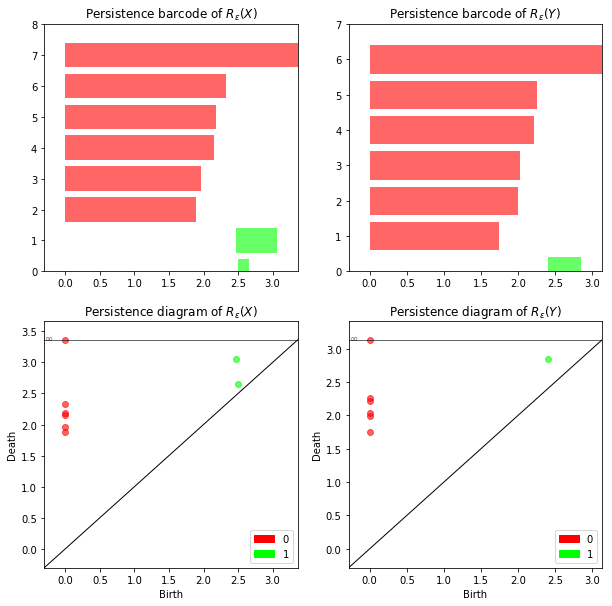

In [4]:
RX = gd.RipsComplex(points=X)
st_X = RX.create_simplex_tree(max_dimension=len(X))
diag_X = st_X.persistence(min_persistence=0.01)

RY = gd.RipsComplex(points=Y)
st_Y = RY.create_simplex_tree(max_dimension=len(Y))
diag_Y = st_Y.persistence(min_persistence=0.01)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
gd.plot_persistence_barcode(diag_X, legend=False)
plt.title(r'Persistence barcode of $R_\varepsilon(X)$')
plt.subplot(2,2,2)
gd.plot_persistence_barcode(diag_Y, legend=False)
plt.title(r'Persistence barcode of $R_\varepsilon(Y)$')
plt.subplot(2,2,3)
gd.plot_persistence_diagram(diag_X, legend=True)
plt.title(r'Persistence diagram of $R_\varepsilon(X)$')
plt.subplot(2,2,4)
gd.plot_persistence_diagram(diag_Y, legend=True)
plt.title(r'Persistence diagram of $R_\varepsilon(Y)$')
plt.show()

Now let us compute the Bottleneck distance between $D(X)$ and $D(Y)$:

In [5]:
persistence_points_X = [x[1] for x in diag_X]
persistence_points_Y = [y[1] for y in diag_Y]
gd.bottleneck_distance(persistence_points_X, persistence_points_Y)

0.21256525302337526

So, $W_\infty(D(X),D(Y)) = 0.21256525302337526$, which is clearly smaller than $2d_H(X,Y)$.